In [2]:
import pandas as pd
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
import rdkit

# NOTE additional dependencies:
# xtb 6.5.1 or newer (anaconda or separarte linux binary may be used)
# OpenBabel 3.3.1 or newer (for simplicity, called from OS as a terminal command)

In [3]:
if rdkit.__version__!='2022.09.1':
    print('Use RDKit version 2022.09.1 for reproducible SMILES reading')

### Load dataset 

,Complex ID,Source_doi,Shift,Brutto,Geometry,Ligand,Smiles,Structure
0,4,https://doi.org/10.1002/ejic.201600573,-1630,[PtCl4]2-,sq-pl,hal,Cl[Pt@SP1](Cl)(Cl)Cl,
1,5,https://doi.org/10.1002/ejic.201600573,-1842,[PtCl3Br]2-,sq-pl,hal,Cl[Pt@SP1](Cl)(Cl)Br,
2,6,https://doi.org/10.1002/ejic.201600573,-2090,trans-[PtCl2Br2],sq-pl,hal,Br[Pt@SP1](Cl)(Br)Cl,
3,7,https://doi.org/10.1002/ejic.201600573,-2103,cis-[PtCl2Br2],sq-pl,hal,Cl[Pt@SP1](Cl)(Br)[Br],
4,8,https://doi.org/10.1002/ejic.201600573,-2346,[PtCl3I]2-,sq-pl,hal,Cl[Pt@SP1](Cl)(Cl)I,
5,9,https://doi.org/10.1002/ejic.201600573,-2377,[PtClBr3]2-,sq-pl,hal,Cl[Pt@SP1](Br)(Br)Br,
6,10,https://doi.org/10.1002/ejic.201600573,-2690,[PtBr4]2-,sq-pl,hal,Br[Pt@SP1](Br)(Br)Br,
7,11,https://doi.org/10.1002/ejic.201600573,-3103,cis-[PtCl2I2]2-,sq-pl,hal,Cl[Pt@SP1](Cl)(I)I,
8,12,https://doi.org/10.1002/ejic.201600573,-3260,[PtBr3I]2-,sq-pl,hal,Br[Pt@SP1](Br)(Br)I,
9,13,https://doi.org/10.1002/ejic.201600573,-3977,trans-[PtBr2I2]2-,sq-pl,hal,I[Pt@SP1](Br)(I)Br,

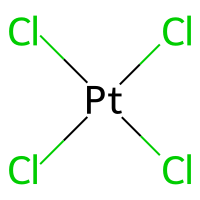
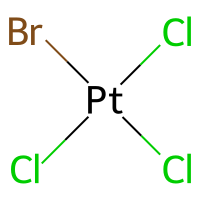
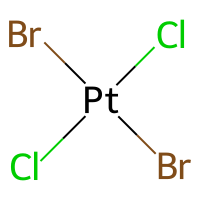
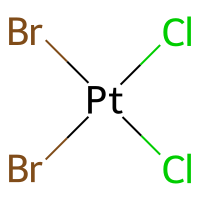
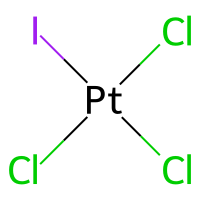
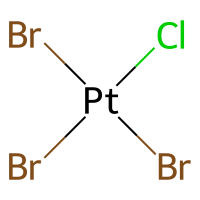
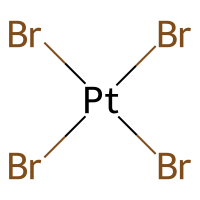
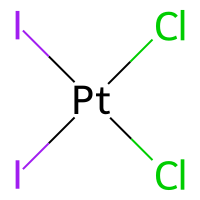
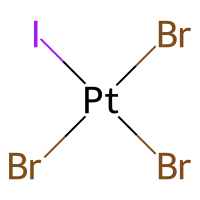
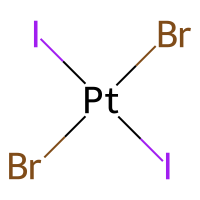
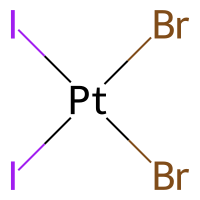
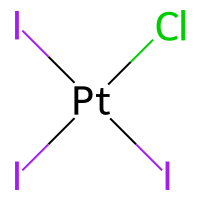
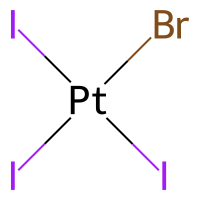
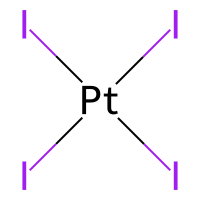
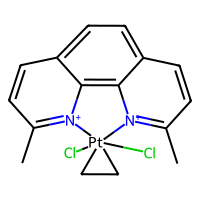
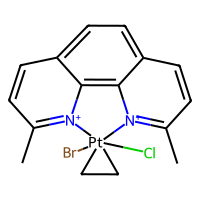
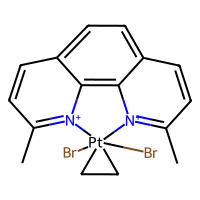
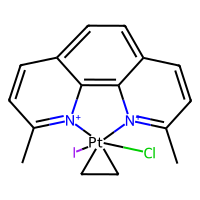
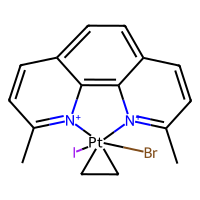
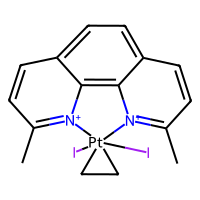
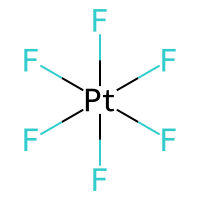
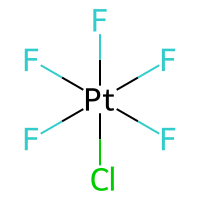
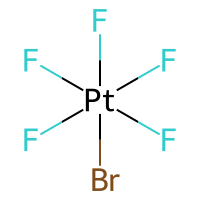
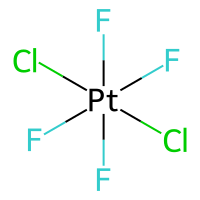
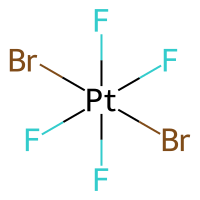
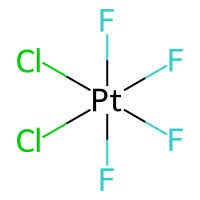
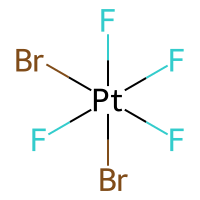
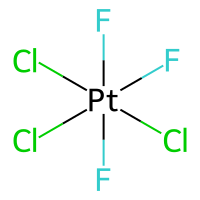
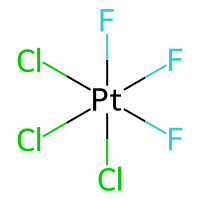
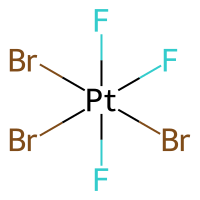
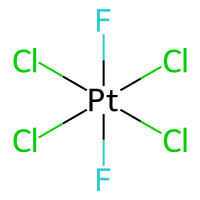
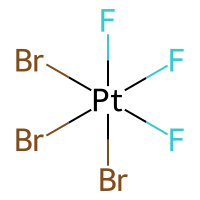
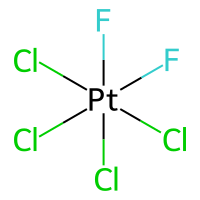
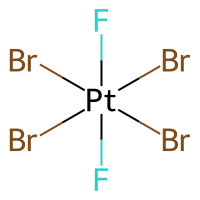
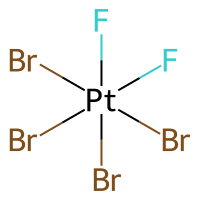
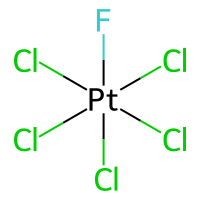
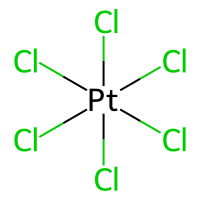
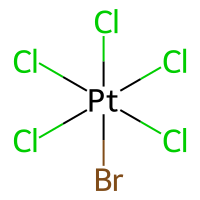
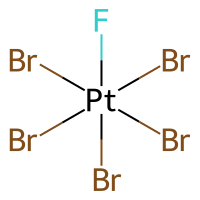
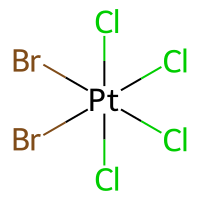
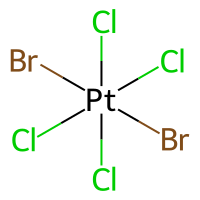
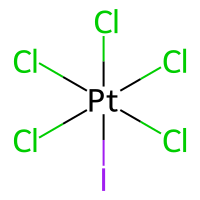
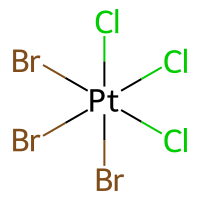
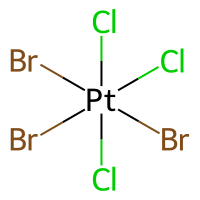
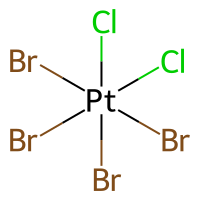
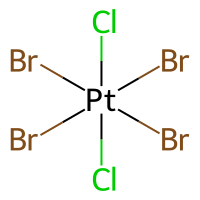
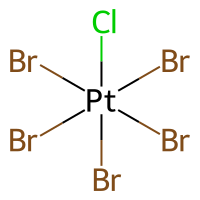
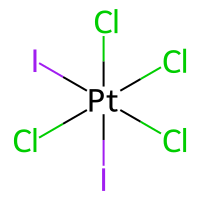
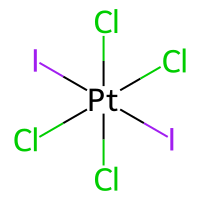
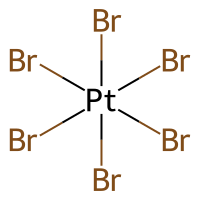
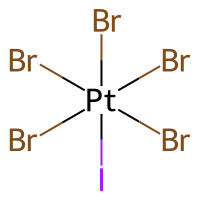
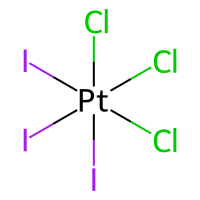
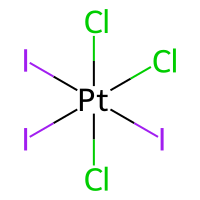
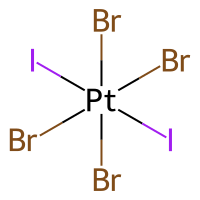
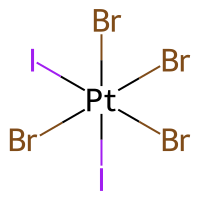
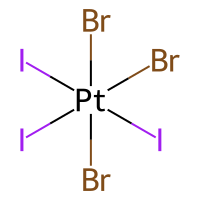
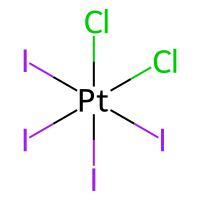
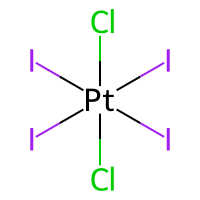
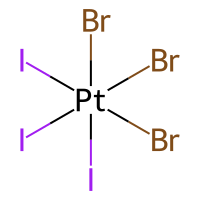
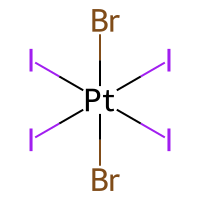
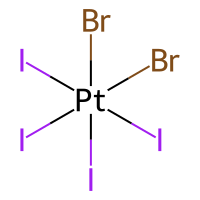
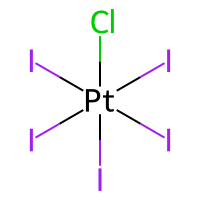
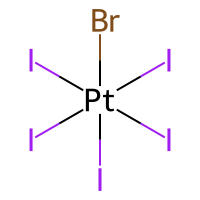
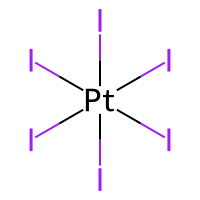
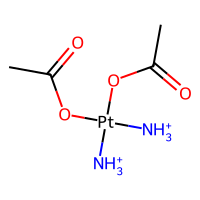
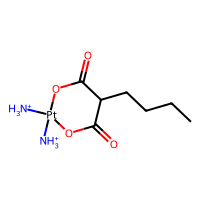
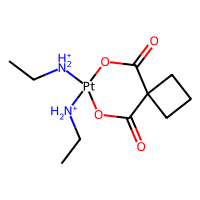
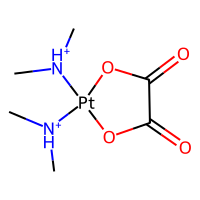
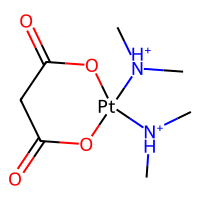
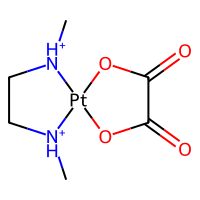
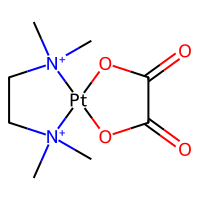
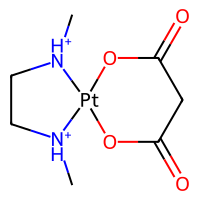
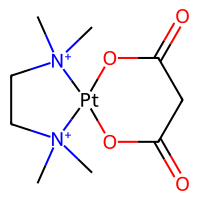
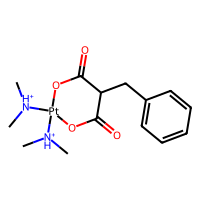
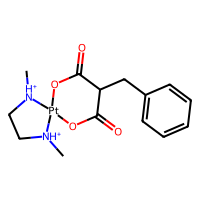
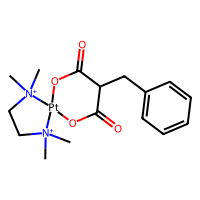
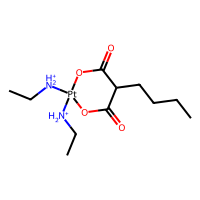
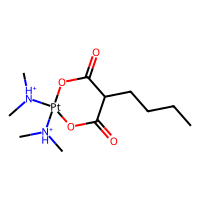
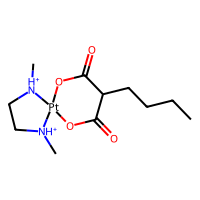
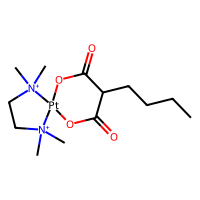
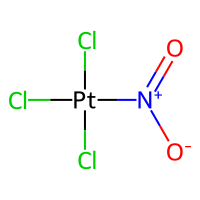
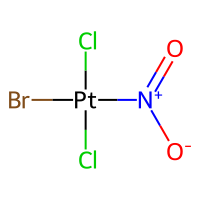
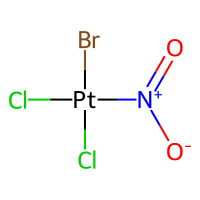
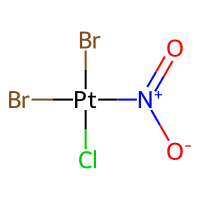
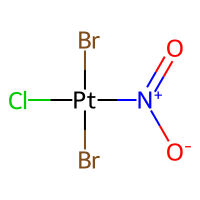
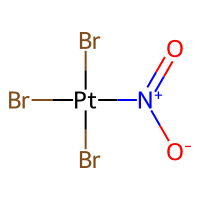
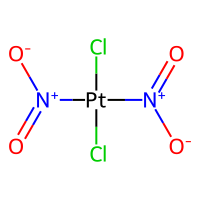
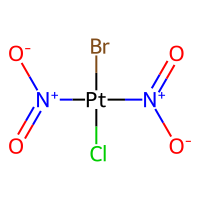
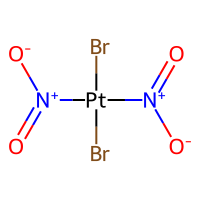
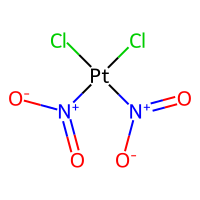
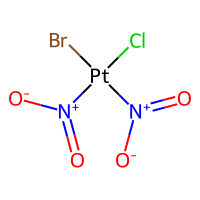
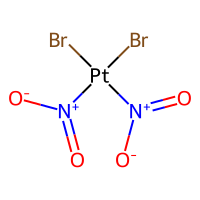
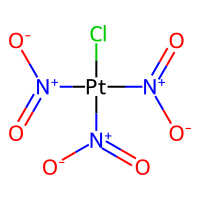
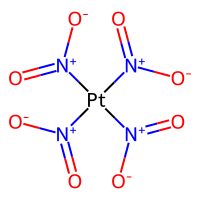
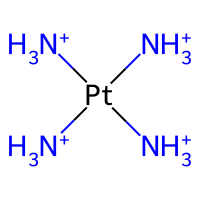
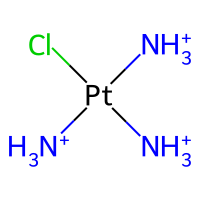
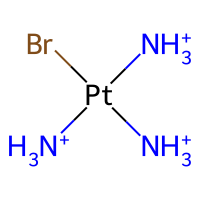
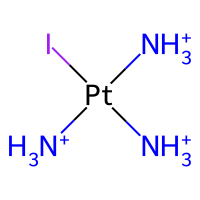
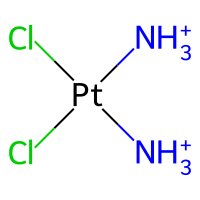
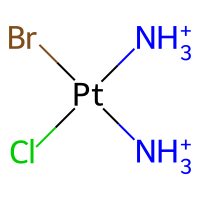
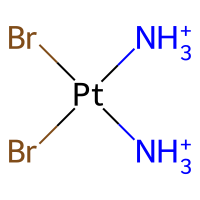
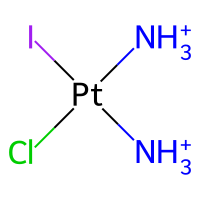
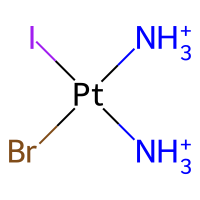
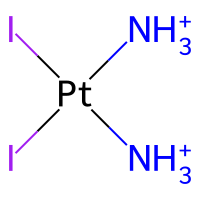
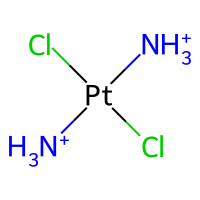
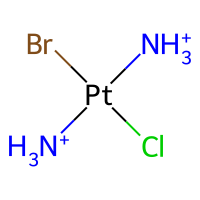
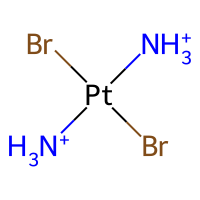
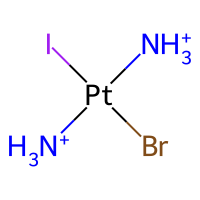
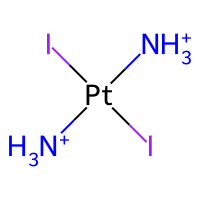
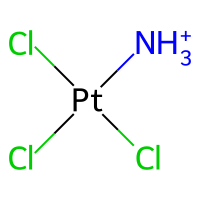
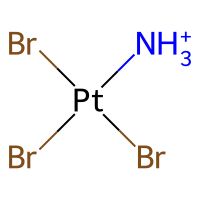
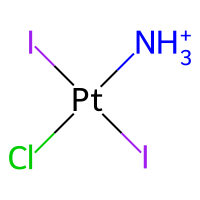
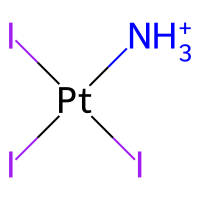

In [4]:
dataset_path = '/Users/evgondar/Desktop/DS/xtb_pt_dataset.csv' #Add str path to xtb_pt_dataset.csv
dataset_initial = pd.read_csv(dataset_path)
dataset_initial = dataset_initial[['Complex ID', 'Source_doi', 'Shift', 'Brutto', 'Geometry',\
                            'Ligand', 'Smiles']]
PandasTools.AddMoleculeColumnToFrame(dataset_initial, smilesCol='Smiles', molCol='Structure')


with pd.option_context('display.max_rows', None,
                      'display.max_columns', None,
                      ):
    display(dataset_initial)

### Check SMILES strings for correctness

In [12]:
#Add path to xtb library https://github.com/grimme-lab/xtb
path_to_xtb = '/opt/miniconda3/bin/xtb '

#Add path to structure, generated from SMILES
path_to_struct = '/Users/evgondar/Desktop/check_smiles/' 

#Geometry optimization commands. Make sure openbabel library is installed
babel_opt = 'obminimize -cg -c 1e1 -ff UFF init.mol > init.pdb ; '
babel_convert = 'obabel init.pdb -O init.xyz; '

# Enter SMILES of complex to check
SMILES_to_check = '[Pt@SP1](N(=O)=O)(N(=O)=O)(Br)Cl.[Na][Na]'

m = Chem.MolFromSmiles(SMILES_to_check)
m3 = Chem.AddHs(m)
AllChem.EmbedMolecule(m3)

print(Chem.MolToMolBlock(m3))
print(Chem.MolToMolBlock(m3),file=open(path_to_struct + 'init.mol','w'))

os.system('cd ' + path_to_struct + ';' +
          babel_opt + babel_convert + path_to_xtb + 'init.xyz --gfn 2 --opt' +
          ' --alpb H2O > opt.out' + ' & wait;')


     RDKit          3D

 11  9  0  0  0  0  0  0  0  0999 V2000
    0.0463    0.7586   -0.0472 Pt  0  0  2  0  0  4  0  0  0  0  0  0
   -1.5190   -0.5348   -0.0880 N   0  0  0  0  0  4  0  0  0  0  0  0
   -1.9989   -1.0933    1.0686 O   0  0  0  0  0  1  0  0  0  0  0  0
   -2.0473   -0.8225   -1.1763 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.3930   -0.7641   -0.0336 N   0  0  0  0  0  4  0  0  0  0  0  0
    1.5790   -1.4988    1.0896 O   0  0  0  0  0  1  0  0  0  0  0  0
    2.0394   -1.0181   -1.0471 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.9736    2.3725    0.3150 Br  0  0  0  0  0  0  0  0  0  0  0  0
   -1.4663    2.6006   -0.0810 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    1.5432    0.0000    0.0000 Na  0  0  0  0  0  1  0  0  0  0  0  0
   -1.5432    0.0000    0.0000 Na  0  0  0  0  0  1  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  2  4  2  0
  1  5  1  0
  5  6  1  0
  5  7  2  0
  1  8  1  0
  1  9  1  0
 10 11  1  0
M  CHG  4   2   1   3  -1   5   1   6  -1
M  END


A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_2	NO
3	O_2	NO
4	O_2	NO
5	N_2	NO
6	O_2	NO
7	O_2	NO
8	Br	NO
9	Cl	NO
10	Na	NO
11	Na	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1    12786375.380    502500607.192
   10     592.820     629.276
   20     465.062     474.986
   30     371.036     372.992
   40     287.628     290.770
   50     211.842     223.810
   60     140.599     140.599
   70      78.459      86.949
   80      49.121      53.964
   90      31.023      31.023
  100      18.246      20.854
  110      12.653      12.982
  120       5.251       5.616
  130       2.388       2.793
  140       0.779       0.779
  150      -0.663      -0.558
  160      -1.513      -1.431
  170 

0

### Generate 3D structures for whole dataset

In [14]:
#Add path to generated 3D structures
structures_path = '/Users/evgondar/Desktop/check_smiles/xtb_pt_dataset/'

# IMPORTANT
# OpenBabel pre-optimization and conversion
babel_opt = 'obminimize -cg -c 1e1 -ff UFF init.mol > init.pdb ; '
babel_convert = 'obabel init.pdb -O init.xyz ; '

# IMPORTANT
# xtb optimization options
path_to_xtb = '/opt/miniconda3/bin/xtb '
xtb_opt = 'init.xyz --gfn 2 --opt --alpb H2O > opt.out & wait;'

for index, row in dataset_initial[['Complex ID', 'Smiles']].iterrows():
    print(row['Complex ID'], row['Smiles'])
    
    try:
        os.mkdir(os.path.join(structures_path, str(row['Complex ID'])))
        
    except:
        print('Required directory already exists!')
    
    
    molecule = Chem.MolFromSmiles(row['Smiles'])
    molecule_3d = Chem.AddHs(molecule)
    AllChem.EmbedMolecule(molecule_3d)

    print(Chem.MolToMolBlock(molecule_3d),file=open(os.path.join(structures_path,
                                                                 str(row['Complex ID']), 'init.mol'),'w'))
    
    os.system('cd ' + os.path.join(structures_path, str(row['Complex ID'])) + ';' +
              babel_opt + babel_convert + path_to_xtb + xtb_opt)

4 Cl[Pt@SP1](Cl)(Cl)Cl



A T O M   T Y P E S

IDX	TYPE	RING
1	Cl	NO
2	Pt4+2	NO
3	Cl	NO
4	Cl	NO
5	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1       6.006      28.455
   10       0.145       0.169
   20       0.033       0.037
   28       0.027       0.027
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.000906seconds. Iterations per second: 32008.8
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


5 Cl[Pt@SP1](Cl)(Cl)Br



A T O M   T Y P E S

IDX	TYPE	RING
1	Cl	NO
2	Pt4+2	NO
3	Cl	NO
4	Cl	NO
5	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1       7.795      19.442
   10       0.142       0.181
   20       0.028       0.028
   28       0.027       0.027
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.000754seconds. Iterations per second: 38461.5
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


6 Br[Pt@SP1](Cl)(Br)Cl



A T O M   T Y P E S

IDX	TYPE	RING
1	Br	NO
2	Pt4+2	NO
3	Cl	NO
4	Br	NO
5	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      11.638      20.843
   10       0.307       0.583
   20       0.031       0.034
   28       0.027       0.027
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.000932seconds. Iterations per second: 31115.9
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


7 Cl[Pt@SP1](Cl)(Br)[Br]



A T O M   T Y P E S

IDX	TYPE	RING
1	Cl	NO
2	Pt4+2	NO
3	Cl	NO
4	Br	NO
5	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1       7.887      42.076
   10       0.061       0.067
   18       0.027       0.027
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.000664seconds. Iterations per second: 28614.5
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


8 Cl[Pt@SP1](Cl)(Cl)I



A T O M   T Y P E S

IDX	TYPE	RING
1	Cl	NO
2	Pt4+2	NO
3	Cl	NO
4	Cl	NO
5	I_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1       8.739      10.878
   10       0.733       0.979
   20       0.030       0.031
   28       0.027       0.027
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.001174seconds. Iterations per second: 24701.9
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


9 Cl[Pt@SP1](Br)(Br)Br



A T O M   T Y P E S

IDX	TYPE	RING
1	Cl	NO
2	Pt4+2	NO
3	Br	NO
4	Br	NO
5	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1       0.116       0.620
    9       0.027       0.027
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.000417seconds. Iterations per second: 23980.8
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


10 Br[Pt@SP1](Br)(Br)Br



A T O M   T Y P E S

IDX	TYPE	RING
1	Br	NO
2	Pt4+2	NO
3	Br	NO
4	Br	NO
5	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      14.123      55.607
   10       0.167       0.218
   20       0.027       0.027
   21       0.027       0.027
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.000722seconds. Iterations per second: 30470.9
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


11 Cl[Pt@SP1](Cl)(I)I



A T O M   T Y P E S

IDX	TYPE	RING
1	Cl	NO
2	Pt4+2	NO
3	Cl	NO
4	I_	NO
5	I_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1       6.303      14.903
   10       0.101       0.122
   20       0.028       0.029
   25       0.027       0.027
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.000898seconds. Iterations per second: 28953.2
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


12 Br[Pt@SP1](Br)(Br)I



A T O M   T Y P E S

IDX	TYPE	RING
1	Br	NO
2	Pt4+2	NO
3	Br	NO
4	Br	NO
5	I_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1       4.934       7.591
   10       0.173       0.213
   20       0.029       0.030
   28       0.027       0.027
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.000884seconds. Iterations per second: 32805.4
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


13 I[Pt@SP1](Br)(I)Br



A T O M   T Y P E S

IDX	TYPE	RING
1	I_	NO
2	Pt4+2	NO
3	Br	NO
4	I_	NO
5	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1       4.280      14.577
   10       0.110       0.157
   20       0.028       0.028
   21       0.028       0.028
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.000697seconds. Iterations per second: 31563.8
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


14 Br[Pt@SP1](Br)(I)I



A T O M   T Y P E S

IDX	TYPE	RING
1	Br	NO
2	Pt4+2	NO
3	Br	NO
4	I_	NO
5	I_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1       8.557      10.366
   10       0.214       0.396
   20       0.032       0.033
   26       0.028       0.028
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.000894seconds. Iterations per second: 30201.3
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


15 Cl[Pt@SP1](I)(I)I



A T O M   T Y P E S

IDX	TYPE	RING
1	Cl	NO
2	Pt4+2	NO
3	I_	NO
4	I_	NO
5	I_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1       5.398      17.145
   10       0.062       0.075
   20       0.028       0.028
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.000719seconds. Iterations per second: 29207.2
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


16 Br[Pt@SP1](I)(I)I



A T O M   T Y P E S

IDX	TYPE	RING
1	Br	NO
2	Pt4+2	NO
3	I_	NO
4	I_	NO
5	I_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1       6.058      13.073
   10       0.319       0.418
   20       0.028       0.028
   22       0.027       0.028
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.000707seconds. Iterations per second: 32531.8
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


17 I[Pt@SP1](I)(I)I



A T O M   T Y P E S

IDX	TYPE	RING
1	I_	NO
2	Pt4+2	NO
3	I_	NO
4	I_	NO
5	I_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1       3.277      21.230
   10       0.028       0.029
   15       0.027       0.027
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.000624seconds. Iterations per second: 25641
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
[13:34:22] UFFTYPER: Unrecognized atom type: Pt6+2 (6)


18 CC1=[N+]2C3=C4[N+]([Pt@OH1]25(Cl)([CH2][CH2]5)(Cl))=C(C=CC4=CC=C3C=C1)C



A T O M   T Y P E S

IDX	TYPE	RING
1	C_3	NO
2	C_R	AR
3	N_R	AR
4	C_R	AR
5	C_R	AR
6	N_R	AR
7	Pt4+2	AL
8	Cl	NO
9	C_3	AL
10	C_3	AL
11	Cl	NO
12	C_R	AR
13	C_R	AR
14	C_R	AR
15	C_R	AR
16	C_R	AR
17	C_R	AR
18	C_R	AR
19	C_R	AR
20	C_R	AR
21	C_3	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO
29	H_	NO
30	H_	NO
31	H_	NO
32	H_	NO
33	H_	NO
34	H_	NO
35	H_	NO
36	H_	NO
37	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 6-7-8 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 6-7-9 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 6-7-11 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-7-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 6-7-10 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 8-7-9 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 8-7-11 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-7-8 (IDX)... WAS

19 CC1=[N+]2C3=C4[N+]([Pt@OH1]25(Cl)([CH2][CH2]5)(Br))=C(C=CC4=CC=C3C=C1)C



A T O M   T Y P E S

IDX	TYPE	RING
1	C_3	NO
2	C_R	AR
3	N_R	AR
4	C_R	AR
5	C_R	AR
6	N_R	AR
7	Pt4+2	AL
8	Cl	NO
9	C_3	AL
10	C_3	AL
11	Br	NO
12	C_R	AR
13	C_R	AR
14	C_R	AR
15	C_R	AR
16	C_R	AR
17	C_R	AR
18	C_R	AR
19	C_R	AR
20	C_R	AR
21	C_3	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO
29	H_	NO
30	H_	NO
31	H_	NO
32	H_	NO
33	H_	NO
34	H_	NO
35	H_	NO
36	H_	NO
37	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 6-7-8 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 6-7-9 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 6-7-11 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-7-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 6-7-10 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 8-7-9 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 8-7-11 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-7-8 (IDX)... WAS

20 CC1=[N+]2C3=C4[N+]([Pt@OH1]25(Br)([CH2][CH2]5)(Br))=C(C=CC4=CC=C3C=C1)C



A T O M   T Y P E S

IDX	TYPE	RING
1	C_3	NO
2	C_R	AR
3	N_R	AR
4	C_R	AR
5	C_R	AR
6	N_R	AR
7	Pt4+2	AL
8	Br	NO
9	C_3	AL
10	C_3	AL
11	Br	NO
12	C_R	AR
13	C_R	AR
14	C_R	AR
15	C_R	AR
16	C_R	AR
17	C_R	AR
18	C_R	AR
19	C_R	AR
20	C_R	AR
21	C_3	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO
29	H_	NO
30	H_	NO
31	H_	NO
32	H_	NO
33	H_	NO
34	H_	NO
35	H_	NO
36	H_	NO
37	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 6-7-8 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 6-7-9 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 6-7-11 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-7-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 6-7-10 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 8-7-9 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 8-7-11 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-7-8 (IDX)... WAS

21 CC1=[N+]2C3=C4[N+]([Pt@OH1]25(Cl)([CH2][CH2]5)(I))=C(C=CC4=CC=C3C=C1)C



A T O M   T Y P E S

IDX	TYPE	RING
1	C_3	NO
2	C_R	AR
3	N_R	AR
4	C_R	AR
5	C_R	AR
6	N_R	AR
7	Pt4+2	AL
8	Cl	NO
9	C_3	AL
10	C_3	AL
11	I_	NO
12	C_R	AR
13	C_R	AR
14	C_R	AR
15	C_R	AR
16	C_R	AR
17	C_R	AR
18	C_R	AR
19	C_R	AR
20	C_R	AR
21	C_3	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO
29	H_	NO
30	H_	NO
31	H_	NO
32	H_	NO
33	H_	NO
34	H_	NO
35	H_	NO
36	H_	NO
37	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 6-7-8 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 6-7-9 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 6-7-11 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-7-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 6-7-10 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 8-7-9 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 8-7-11 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-7-8 (IDX)... WAS

22 CC1=[N+]2C3=C4[N+]([Pt@OH1]25(Br)([CH2][CH2]5)(I))=C(C=CC4=CC=C3C=C1)C



A T O M   T Y P E S

IDX	TYPE	RING
1	C_3	NO
2	C_R	AR
3	N_R	AR
4	C_R	AR
5	C_R	AR
6	N_R	AR
7	Pt4+2	AL
8	Br	NO
9	C_3	AL
10	C_3	AL
11	I_	NO
12	C_R	AR
13	C_R	AR
14	C_R	AR
15	C_R	AR
16	C_R	AR
17	C_R	AR
18	C_R	AR
19	C_R	AR
20	C_R	AR
21	C_3	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO
29	H_	NO
30	H_	NO
31	H_	NO
32	H_	NO
33	H_	NO
34	H_	NO
35	H_	NO
36	H_	NO
37	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 6-7-8 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 6-7-9 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 6-7-11 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-7-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 6-7-10 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 8-7-9 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 8-7-11 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-7-8 (IDX)... WAS

23 CC1=[N+]2C3=C4[N+]([Pt@OH1]25(I)([CH2][CH2]5)(I))=C(C=CC4=CC=C3C=C1)C



A T O M   T Y P E S

IDX	TYPE	RING
1	C_3	NO
2	C_R	AR
3	N_R	AR
4	C_R	AR
5	C_R	AR
6	N_R	AR
7	Pt4+2	AL
8	I_	NO
9	C_3	AL
10	C_3	AL
11	I_	NO
12	C_R	AR
13	C_R	AR
14	C_R	AR
15	C_R	AR
16	C_R	AR
17	C_R	AR
18	C_R	AR
19	C_R	AR
20	C_R	AR
21	C_3	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO
29	H_	NO
30	H_	NO
31	H_	NO
32	H_	NO
33	H_	NO
34	H_	NO
35	H_	NO
36	H_	NO
37	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 6-7-8 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 6-7-9 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 6-7-11 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-7-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 6-7-10 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 8-7-9 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 8-7-11 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-7-8 (IDX)... WAS

24 [Pt@OH1]([F])([F])([F])([F])([F])[F]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	F_	NO
3	F_	NO
4	F_	NO
5	F_	NO
6	F_	NO
7	F_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

25 [Pt@OH1]([F])([F])([F])([F])([F])[Cl]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	F_	NO
3	F_	NO
4	F_	NO
5	F_	NO
6	F_	NO
7	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

26 [Pt@OH1]([F])([F])([F])([F])([F])[Br]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	F_	NO
3	F_	NO
4	F_	NO
5	F_	NO
6	F_	NO
7	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

27 [Pt@OH1]([Cl])([F])([F])([F])([F])[Cl]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Cl	NO
3	F_	NO
4	F_	NO
5	F_	NO
6	F_	NO
7	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
[13:35:10] UFFTYPER: Unrecognized atom type: Pt6+2 (0)


28 [Pt@OH1]([Br])([F])([F])([F])([F])[Br]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Br	NO
3	F_	NO
4	F_	NO
5	F_	NO
6	F_	NO
7	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

29 [Pt@OH1]([Cl])([Cl])([F])([F])([F])[F]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Cl	NO
3	Cl	NO
4	F_	NO
5	F_	NO
6	F_	NO
7	F_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

30 [Pt@OH1]([F])([F])([F])([F])([Br])[Br]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	F_	NO
3	F_	NO
4	F_	NO
5	F_	NO
6	Br	NO
7	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
[13:35:15] UFFTYPER: Unrecognized atom type: Pt6+2 (0)


31 [Pt@OH1]([F])([F])([Cl])([Cl])([Cl])[F]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	F_	NO
3	F_	NO
4	Cl	NO
5	Cl	NO
6	Cl	NO
7	F_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

32 [Pt@OH1]([F])([F])([F])([Cl])([Cl])[Cl]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	F_	NO
3	F_	NO
4	F_	NO
5	Cl	NO
6	Cl	NO
7	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

33 [Pt@OH1]([F])([F])([Br])([Br])([Br])[F]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	F_	NO
3	F_	NO
4	Br	NO
5	Br	NO
6	Br	NO
7	F_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

34 [Pt@OH1]([F])([Cl])([Cl])([Cl])([Cl])[F]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	F_	NO
3	Cl	NO
4	Cl	NO
5	Cl	NO
6	Cl	NO
7	F_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

35 [Pt@OH1]([F])([F])([F])([Br])([Br])[Br]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	F_	NO
3	F_	NO
4	F_	NO
5	Br	NO
6	Br	NO
7	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

36 [Pt@OH1]([Cl])([Cl])([Cl])([Cl])([F])[F]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Cl	NO
3	Cl	NO
4	Cl	NO
5	Cl	NO
6	F_	NO
7	F_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

37 [Pt@OH1]([F])([Br])([Br])([Br])([Br])[F]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	F_	NO
3	Br	NO
4	Br	NO
5	Br	NO
6	Br	NO
7	F_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

38 [Pt@OH1]([F])([Br])([Br])([Br])([F])[Br]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	F_	NO
3	Br	NO
4	Br	NO
5	Br	NO
6	F_	NO
7	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
[13:35:23] UFFTYPER: Unrecognized atom type: Pt6+2 (0)


39 [Pt@OH1]([F])([Cl])([Cl])([Cl])([Cl])[Cl]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	F_	NO
3	Cl	NO
4	Cl	NO
5	Cl	NO
6	Cl	NO
7	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

40 [Pt@OH1]([Cl])([Cl])([Cl])([Cl])([Cl])[Cl]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Cl	NO
3	Cl	NO
4	Cl	NO
5	Cl	NO
6	Cl	NO
7	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

41 [Pt@OH1]([Cl])([Cl])([Cl])([Cl])([Cl])[Br]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Cl	NO
3	Cl	NO
4	Cl	NO
5	Cl	NO
6	Cl	NO
7	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

42 [Pt@OH1]([Br])([F])([Br])([Br])([Br])[Br]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Br	NO
3	F_	NO
4	Br	NO
5	Br	NO
6	Br	NO
7	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

43 [Pt@OH1]([Br])([Br])([Cl])([Cl])([Cl])[Cl]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Br	NO
3	Br	NO
4	Cl	NO
5	Cl	NO
6	Cl	NO
7	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

44 [Pt@OH1]([Br])([Cl])([Cl])([Cl])([Cl])[Br]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Br	NO
3	Cl	NO
4	Cl	NO
5	Cl	NO
6	Cl	NO
7	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
[13:35:31] UFFTYPER: Unrecognized atom type: Pt6+2 (0)


45 [Pt@OH1]([Cl])([Cl])([Cl])([Cl])([Cl])[I]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Cl	NO
3	Cl	NO
4	Cl	NO
5	Cl	NO
6	Cl	NO
7	I_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

46 [Pt@OH1]([Cl])([Cl])([Cl])([Br])([Br])[Br]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Cl	NO
3	Cl	NO
4	Cl	NO
5	Br	NO
6	Br	NO
7	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

47 [Pt@OH1]([Cl])([Cl])([Br])([Br])([Br])[Cl]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Cl	NO
3	Cl	NO
4	Br	NO
5	Br	NO
6	Br	NO
7	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
[13:35:36] UFFTYPER: Unrecognized atom type: Pt6+2 (0)


48 [Pt@OH1]([Br])([Br])([Br])([Br])([Cl])[Cl]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Br	NO
3	Br	NO
4	Br	NO
5	Br	NO
6	Cl	NO
7	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

49 [Pt@OH1]([Cl])([Br])([Br])([Br])([Br])[Cl]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Cl	NO
3	Br	NO
4	Br	NO
5	Br	NO
6	Br	NO
7	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
[13:35:39] UFFTYPER: Unrecognized atom type: Pt6+2 (0)


50 [Pt@OH1]([Br])([Br])([Br])([Br])([Cl])[Br]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Br	NO
3	Br	NO
4	Br	NO
5	Br	NO
6	Cl	NO
7	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
[13:35:41] UFFTYPER: Unrecognized atom type: Pt6+2 (0)


51 [Pt@OH1]([Cl])([Cl])([Cl])([Cl])([I])[I]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Cl	NO
3	Cl	NO
4	Cl	NO
5	Cl	NO
6	I_	NO
7	I_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

52 [Pt@OH1]([I])([Cl])([Cl])([Cl])([Cl])[I]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	I_	NO
3	Cl	NO
4	Cl	NO
5	Cl	NO
6	Cl	NO
7	I_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
[13:35:45] UFFTYPER: Unrecognized atom type: Pt6+2 (0)


53 [Pt@OH1]([Br])([Br])([Br])([Br])([Br])[Br]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Br	NO
3	Br	NO
4	Br	NO
5	Br	NO
6	Br	NO
7	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

54 [Pt@OH1]([Br])([Br])([Br])([Br])([Br])[I]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Br	NO
3	Br	NO
4	Br	NO
5	Br	NO
6	Br	NO
7	I_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

55 [Pt@OH1]([Cl])([Cl])([Cl])([I])([I])[I]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Cl	NO
3	Cl	NO
4	Cl	NO
5	I_	NO
6	I_	NO
7	I_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

56 [Pt@OH1]([I])([Cl])([I])([Cl])([I])[Cl]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	I_	NO
3	Cl	NO
4	I_	NO
5	Cl	NO
6	I_	NO
7	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

57 [Pt@OH1]([I])([Br])([Br])([Br])([Br])[I]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	I_	NO
3	Br	NO
4	Br	NO
5	Br	NO
6	Br	NO
7	I_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

58 [Pt@OH1]([Br])([Br])([Br])([Br])([I])[I]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Br	NO
3	Br	NO
4	Br	NO
5	Br	NO
6	I_	NO
7	I_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

59 [Pt@OH1]([I])([Br])([I])([Br])([I])[Br]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	I_	NO
3	Br	NO
4	I_	NO
5	Br	NO
6	I_	NO
7	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

60 [Pt@OH1]([I])([Cl])([Cl])([I])([I])[I]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	I_	NO
3	Cl	NO
4	Cl	NO
5	I_	NO
6	I_	NO
7	I_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

61 [Pt@OH1]([Cl])([I])([I])([I])([I])[Cl]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Cl	NO
3	I_	NO
4	I_	NO
5	I_	NO
6	I_	NO
7	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

62 [Pt@OH1]([Br])([Br])([Br])([I])([I])[I]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Br	NO
3	Br	NO
4	Br	NO
5	I_	NO
6	I_	NO
7	I_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

63 [Pt@OH1]([Br])([I])([I])([I])([I])[Br]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Br	NO
3	I_	NO
4	I_	NO
5	I_	NO
6	I_	NO
7	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

64 [Pt@OH1]([I])([I])([Br])([Br])([I])[I]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	I_	NO
3	I_	NO
4	Br	NO
5	Br	NO
6	I_	NO
7	I_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

65 [Pt@OH1]([I])([I])([I])([I])([I])[Cl]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	I_	NO
3	I_	NO
4	I_	NO
5	I_	NO
6	I_	NO
7	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
[13:36:17] UFFTYPER: Unrecognized atom type: Pt6+2 (0)


66 [Pt@OH1]([I])([I])([I])([I])([I])[Br]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	I_	NO
3	I_	NO
4	I_	NO
5	I_	NO
6	I_	NO
7	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

67 [Pt@OH1]([I])([I])([I])([I])([I])[I]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	I_	NO
3	I_	NO
4	I_	NO
5	I_	NO
6	I_	NO
7	I_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
    CORRECTED COORDINATION FOR ANGLE 2-1-3 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 2-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-4 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 3-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-5 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-6 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATION FOR ANGLE 4-1-7 (IDX)... WAS 4 NOW 6
    CORRECTED COORDINATI

199 [Pt@SP1](OC(=O)C)([NH3+])([NH3+])OC(=O)C



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	O_2	NO
3	C_2	NO
4	O_2	NO
5	C_3	NO
6	N_3	NO
7	N_3	NO
8	O_2	NO
9	C_2	NO
10	O_2	NO
11	C_3	NO
12	H_	NO
13	H_	NO
14	H_	NO
15	H_	NO
16	H_	NO
17	H_	NO
18	H_	NO
19	H_	NO
20	H_	NO
21	H_	NO
22	H_	NO
23	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1     232.269     284.365
   10     171.770     175.939
   20     156.740     156.740
   30     136.708     138.971
   40     123.588     127.329
   50     113.371     114.477
   60     106.654     107.466
   70     102.731     102.737
   80     102.668     102.674
   90     102.607     102.613
  100     102.550     102.556
  110     102.496     102.502
  120     102.446     102.451
  130     102.398     1

201 [Pt@SP1]1(OC(=O)C(C(=O)O1)CCCC)([NH3+])[NH3+]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	AL
2	O_2	AL
3	C_2	AL
4	O_2	NO
5	C_3	AL
6	C_2	AL
7	O_2	NO
8	O_2	AL
9	C_3	NO
10	C_3	NO
11	C_3	NO
12	C_3	NO
13	N_3	NO
14	N_3	NO
15	H_	NO
16	H_	NO
17	H_	NO
18	H_	NO
19	H_	NO
20	H_	NO
21	H_	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO
29	H_	NO
30	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1     425.545     517.377
   10     269.163     275.029
   20     222.221     222.560
   30     203.795     205.201
   40     198.501     198.501
   50     198.412     198.421
   60     198.329     198.337
   70     198.251     198.259
   80     198.180     198.186
   90     198.113     198.120
  100     198.052     198.058
  110     197.707

1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


205 [Pt@SP1]1(OC(=O)C2(CCC2)C(=O)O1)([NH2+]CC)[NH2+](CC)



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	AL
2	O_2	AL
3	C_2	AL
4	O_2	NO
5	C_3	AL
6	C_3	AL
7	C_3	AL
8	C_3	AL
9	C_2	AL
10	O_2	NO
11	O_2	AL
12	N_3	NO
13	C_3	NO
14	C_3	NO
15	N_3	NO
16	C_3	NO
17	C_3	NO
18	H_	NO
19	H_	NO
20	H_	NO
21	H_	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO
29	H_	NO
30	H_	NO
31	H_	NO
32	H_	NO
33	H_	NO
34	H_	NO
35	H_	NO
36	H_	NO
37	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1    1128.869    1258.434
   10     945.570     953.361
   20     903.412     906.556
   30     888.430     890.992
   40     878.517     880.116
   50     872.143     872.967
   60     867.402     868.020
   70     864.158     864.630
   80     860.741     861.423
   90     8

1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


208 [Pt@SP1]1(OC(=O)C(=O)O1)([NH+](C)C)[NH+](C)C



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	AL
2	O_2	AL
3	C_2	AL
4	O_2	NO
5	C_2	AL
6	O_2	NO
7	O_2	AL
8	N_3	NO
9	C_3	NO
10	C_3	NO
11	N_3	NO
12	C_3	NO
13	C_3	NO
14	H_	NO
15	H_	NO
16	H_	NO
17	H_	NO
18	H_	NO
19	H_	NO
20	H_	NO
21	H_	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1     442.766     609.260
   10     382.284     386.411
   20     375.913     375.921
   30     370.963     370.971
   40     368.311     368.318
   50     367.706     367.711
   60     367.654     367.659
   70     367.611     367.615
   80     367.575     367.578
   90     367.545     367.548
  100     367.519     367.521
  110     366.360     366.365
  120     364.9

209 [Pt@SP1]1(OC(=O)CC(=O)O1)([NH+](C)C)[NH+](C)C



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	AL
2	O_2	AL
3	C_2	AL
4	O_2	NO
5	C_3	AL
6	C_2	AL
7	O_2	NO
8	O_2	AL
9	N_3	NO
10	C_3	NO
11	C_3	NO
12	N_3	NO
13	C_3	NO
14	C_3	NO
15	H_	NO
16	H_	NO
17	H_	NO
18	H_	NO
19	H_	NO
20	H_	NO
21	H_	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO
29	H_	NO
30	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1     684.023     873.230
   10     455.614     459.553
   20     420.611     420.900
   30     408.226     409.456
   40     400.724     400.871
   50     393.325     395.141
   60     386.494     387.315
   70     380.725     381.440
   80     376.454     376.784
   90     371.781     372.318
  100     368.667     368.775
  110     365.841

338 [Pt@SP1]12([NH+](CC[NH+]1C)C)OC(=O)C(=O)O2



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	AL
2	N_3	AL
3	C_3	AL
4	C_3	AL
5	N_3	AL
6	C_3	NO
7	C_3	NO
8	O_2	AL
9	C_2	AL
10	O_2	NO
11	C_2	AL
12	O_2	NO
13	O_2	AL
14	H_	NO
15	H_	NO
16	H_	NO
17	H_	NO
18	H_	NO
19	H_	NO
20	H_	NO
21	H_	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1    1177.613    1452.539
   10     921.042     934.853
   20     870.830     873.075
   30     835.479     840.050
   40     751.487     759.820
   50     632.065     642.807
   60     544.660     553.063
   70     488.156     488.786
   80     484.383     484.397
   90     484.245     484.258
  100     484.116     484.129
  110     483.997     484.008
  120     483.886     483.897
  1

normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


339 [Pt@SP1]12([N+](CC[N+]1(C)C)(C)C)OC(=O)C(=O)O2



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	AL
2	N_3	AL
3	C_3	AL
4	C_3	AL
5	N_3	AL
6	C_3	NO
7	C_3	NO
8	C_3	NO
9	C_3	NO
10	O_2	AL
11	C_2	AL
12	O_2	NO
13	C_2	AL
14	O_2	NO
15	O_2	AL
16	H_	NO
17	H_	NO
18	H_	NO
19	H_	NO
20	H_	NO
21	H_	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO
29	H_	NO
30	H_	NO
31	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1    1238.360    1481.669
   10     988.144     994.763
   20     933.451     940.353
   30     904.584     907.916
   40     873.716     876.734
   50     834.789     841.466
   60     763.830     784.336
   70     683.030     693.704
   80     616.552     624.205
   90     563.734     570.328
  100     519.444     523.733
  110  

340 [Pt@SP1]12([NH+](CC[NH+]1C)C)OC(=O)CC(=O)O2



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	AL
2	N_3	AL
3	C_3	AL
4	C_3	AL
5	N_3	AL
6	C_3	NO
7	C_3	NO
8	O_2	AL
9	C_2	AL
10	O_2	NO
11	C_3	AL
12	C_2	AL
13	O_2	NO
14	O_2	AL
15	H_	NO
16	H_	NO
17	H_	NO
18	H_	NO
19	H_	NO
20	H_	NO
21	H_	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1     990.129    1209.504
   10     810.870     818.700
   20     766.410     772.431
   30     720.684     726.318
   40     585.084     615.672
   50     478.237     487.819
   60     432.792     436.032
   70     411.062     411.983
   80     395.740     395.740
   90     380.547     380.605
  100     372.445     372.697
  110     365.632     366.730
  120

341 [Pt@SP1]12([N+](CC[N+]1(C)C)(C)C)OC(=O)CC(=O)O2



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	AL
2	N_3	AL
3	C_3	AL
4	C_3	AL
5	N_3	AL
6	C_3	NO
7	C_3	NO
8	C_3	NO
9	C_3	NO
10	O_2	AL
11	C_2	AL
12	O_2	NO
13	C_3	AL
14	C_2	AL
15	O_2	NO
16	O_2	AL
17	H_	NO
18	H_	NO
19	H_	NO
20	H_	NO
21	H_	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO
29	H_	NO
30	H_	NO
31	H_	NO
32	H_	NO
33	H_	NO
34	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1    1082.259    1324.723
   10     864.987     869.915
   20     799.500     804.408
   30     763.817     768.036
   40     739.624     742.839
   50     717.716     718.880
   60     699.033     701.772
   70     671.903     671.934
   80     636.607     639.491
   90     588.828     590.738
  100    

342 [Pt@SP1]1([NH+](C)C)([NH+](C)C)OC(=O)C(C(=O)O1)Cc1ccccc1



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	AL
2	N_3	NO
3	C_3	NO
4	C_3	NO
5	N_3	NO
6	C_3	NO
7	C_3	NO
8	O_2	AL
9	C_2	AL
10	O_2	NO
11	C_3	AL
12	C_2	AL
13	O_2	NO
14	O_2	AL
15	C_3	NO
16	C_R	AR
17	C_R	AR
18	C_R	AR
19	C_R	AR
20	C_R	AR
21	C_R	AR
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO
29	H_	NO
30	H_	NO
31	H_	NO
32	H_	NO
33	H_	NO
34	H_	NO
35	H_	NO
36	H_	NO
37	H_	NO
38	H_	NO
39	H_	NO
40	H_	NO
41	H_	NO
42	H_	NO
43	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1     536.494     721.536
   10     415.270     415.304
   20     408.126     408.158
   30     407.818     407.848
   40     407.530     407.558
   50     407.263     407.289
   60     407.017     407.041
   70     406

1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


343 [Pt@SP1]12(OC(=O)C(C(=O)O1)Cc1ccccc1)[NH+](CC[NH+]2C)C



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	AL
2	O_2	AL
3	C_2	AL
4	O_2	NO
5	C_3	AL
6	C_2	AL
7	O_2	NO
8	O_2	AL
9	C_3	NO
10	C_R	AR
11	C_R	AR
12	C_R	AR
13	C_R	AR
14	C_R	AR
15	C_R	AR
16	N_3	AL
17	C_3	AL
18	C_3	AL
19	N_3	AL
20	C_3	NO
21	C_3	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO
29	H_	NO
30	H_	NO
31	H_	NO
32	H_	NO
33	H_	NO
34	H_	NO
35	H_	NO
36	H_	NO
37	H_	NO
38	H_	NO
39	H_	NO
40	H_	NO
41	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1    1844.648    2045.861
   10    1691.159    1697.464
   20    1650.823    1654.963
   30    1612.764    1615.565
   40    1570.845    1576.863
   50    1468.845    1482.165
   60    1366.154    1380.787
   70    1311.698    1313.751
 

344 [Pt@SP1]12(OC(=O)C(C(=O)O1)Cc1ccccc1)[N+](C)(CC[N+]2(C)C)C



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	AL
2	O_2	AL
3	C_2	AL
4	O_2	NO
5	C_3	AL
6	C_2	AL
7	O_2	NO
8	O_2	AL
9	C_3	NO
10	C_R	AR
11	C_R	AR
12	C_R	AR
13	C_R	AR
14	C_R	AR
15	C_R	AR
16	N_3	AL
17	C_3	NO
18	C_3	AL
19	C_3	AL
20	N_3	AL
21	C_3	NO
22	C_3	NO
23	C_3	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO
29	H_	NO
30	H_	NO
31	H_	NO
32	H_	NO
33	H_	NO
34	H_	NO
35	H_	NO
36	H_	NO
37	H_	NO
38	H_	NO
39	H_	NO
40	H_	NO
41	H_	NO
42	H_	NO
43	H_	NO
44	H_	NO
45	H_	NO
46	H_	NO
47	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1    2025.899    2279.687
   10    1774.557    1785.095
   20    1693.189    1700.555
   30    1651.295    1658.900
   40    1606.788    1615.599
   50    1500.423    1522.902
   60

345 [Pt@SP1]1(OC(=O)C(C(=O)O1)CCCC)([NH2+]CC)[NH2+]CC



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	AL
2	O_2	AL
3	C_2	AL
4	O_2	NO
5	C_3	AL
6	C_2	AL
7	O_2	NO
8	O_2	AL
9	C_3	NO
10	C_3	NO
11	C_3	NO
12	C_3	NO
13	N_3	NO
14	C_3	NO
15	C_3	NO
16	N_3	NO
17	C_3	NO
18	C_3	NO
19	H_	NO
20	H_	NO
21	H_	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO
29	H_	NO
30	H_	NO
31	H_	NO
32	H_	NO
33	H_	NO
34	H_	NO
35	H_	NO
36	H_	NO
37	H_	NO
38	H_	NO
39	H_	NO
40	H_	NO
41	H_	NO
42	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1     626.008     864.150
   10     443.028     443.410
   20     417.481     417.651
   30     397.776     397.805
   40     382.217     382.228
   50     380.636     380.644
   60     376.324     376.338
   70     369.819     371

346 [Pt@SP1]1(OC(=O)C(C(=O)O1)CCCC)([NH+](C)C)[NH+](C)C



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	AL
2	O_2	AL
3	C_2	AL
4	O_2	NO
5	C_3	AL
6	C_2	AL
7	O_2	NO
8	O_2	AL
9	C_3	NO
10	C_3	NO
11	C_3	NO
12	C_3	NO
13	N_3	NO
14	C_3	NO
15	C_3	NO
16	N_3	NO
17	C_3	NO
18	C_3	NO
19	H_	NO
20	H_	NO
21	H_	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO
29	H_	NO
30	H_	NO
31	H_	NO
32	H_	NO
33	H_	NO
34	H_	NO
35	H_	NO
36	H_	NO
37	H_	NO
38	H_	NO
39	H_	NO
40	H_	NO
41	H_	NO
42	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1     576.308     724.055
   10     413.612     417.294
   20     378.024     381.802
   30     356.764     356.855
   40     333.028     334.381
   50     316.681     318.597
   60     308.965     309.980
   70     301.846     302

347 [Pt@SP1]12([NH+](CC[NH+]1C)C)OC(=O)C(C(=O)O2)CCCC



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	AL
2	N_3	AL
3	C_3	AL
4	C_3	AL
5	N_3	AL
6	C_3	NO
7	C_3	NO
8	O_2	AL
9	C_2	AL
10	O_2	NO
11	C_3	AL
12	C_2	AL
13	O_2	NO
14	O_2	AL
15	C_3	NO
16	C_3	NO
17	C_3	NO
18	C_3	NO
19	H_	NO
20	H_	NO
21	H_	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO
29	H_	NO
30	H_	NO
31	H_	NO
32	H_	NO
33	H_	NO
34	H_	NO
35	H_	NO
36	H_	NO
37	H_	NO
38	H_	NO
39	H_	NO
40	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1     931.506    1125.268
   10     759.308     762.509
   20     681.256     683.216
   30     514.464     538.063
   40     343.756     358.029
   50     305.610     310.405
   60     281.599     284.905
   70     261.239     262.516
   80     248

348 [Pt@SP1]12([N+](CC[N+]1(C)C)(C)C)OC(=O)C(C(=O)O2)CCCC



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	AL
2	N_3	AL
3	C_3	AL
4	C_3	AL
5	N_3	AL
6	C_3	NO
7	C_3	NO
8	C_3	NO
9	C_3	NO
10	O_2	AL
11	C_2	AL
12	O_2	NO
13	C_3	AL
14	C_2	AL
15	O_2	NO
16	O_2	AL
17	C_3	NO
18	C_3	NO
19	C_3	NO
20	C_3	NO
21	H_	NO
22	H_	NO
23	H_	NO
24	H_	NO
25	H_	NO
26	H_	NO
27	H_	NO
28	H_	NO
29	H_	NO
30	H_	NO
31	H_	NO
32	H_	NO
33	H_	NO
34	H_	NO
35	H_	NO
36	H_	NO
37	H_	NO
38	H_	NO
39	H_	NO
40	H_	NO
41	H_	NO
42	H_	NO
43	H_	NO
44	H_	NO
45	H_	NO
46	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1    1055.353    1287.479
   10     821.674     830.448
   20     745.618     752.939
   30     686.448     688.026
   40     634.164     638.290
   50     515.136     531.987
   60     457.740

1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


370 [Pt@SP1](N(=O)=O)(Cl)(Cl)Cl



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_2	NO
3	O_2	NO
4	O_2	NO
5	Cl	NO
6	Cl	NO
7	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      38.029      60.265
   10      13.487      16.611
   20       7.529       8.037
   30       1.751       1.751
   40      -0.848      -0.676
   50      -1.752      -1.599
   60      -1.938      -1.938
   70      -2.056      -2.050
   80      -2.088      -2.082
   90      -2.098      -2.098
  100      -2.103      -2.103
  110      -2.105      -2.105
  113      -2.107      -2.105
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.005066seconds. Iterations per second: 22503
1 molecule converted
normal termination of xtb
Note: The following floating-point 

371 [Pt@SP1](Cl)(N(=O)=O)(Cl)Br



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Cl	NO
3	N_2	NO
4	O_2	NO
5	O_2	NO
6	Cl	NO
7	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      16.599      43.305
   10       2.788       4.245
   20       1.095       1.293
   30       0.010       0.010
   40      -0.643      -0.643
   50      -1.059      -0.952
   60      -1.330      -1.298
   70      -1.442      -1.428
   80      -1.525      -1.512
   90      -1.563      -1.561
  100      -1.591      -1.591
  110      -1.616      -1.616
  120      -1.644      -1.640
  130      -1.655      -1.653
  140      -1.672      -1.672
  149      -1.684      -1.684
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.006015seconds. Iterations per second

372 [Pt@SP1](Br)(N(=O)=O)(Cl)Cl



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Br	NO
3	N_2	NO
4	O_2	NO
5	O_2	NO
6	Cl	NO
7	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1       4.975      35.738
   10      -1.440      -1.275
   20      -1.976      -1.937
   30      -2.069      -2.069
   40      -2.094      -2.094
   50      -2.103      -2.100
   60      -2.108      -2.108
   64      -2.109      -2.109
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.002668seconds. Iterations per second: 24362.8
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


373 [Pt@SP1](Br)(Br)(N(=O)=O)Cl



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Br	NO
3	Br	NO
4	N_2	NO
5	O_2	NO
6	O_2	NO
7	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      44.423      61.241
   10      14.049      14.705
   20       5.094       5.697
   30       2.140       2.140
   40       0.291       0.501
   50      -0.665      -0.665
   60      -1.307      -1.244
   70      -1.554      -1.542
   80      -1.736      -1.715
   90      -1.780      -1.777
  100      -1.811      -1.811
  110      -1.837      -1.835
  120      -1.852      -1.849
  130      -1.859      -1.858
  140      -1.866      -1.865
  150      -1.875      -1.874
  160      -1.882      -1.881
  161      -1.882      -1.882
    CONJUGATE GRADIENT

374 [Pt@SP1](Br)(Cl)(Br)N(=O)=O



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Br	NO
3	Cl	NO
4	Br	NO
5	N_2	NO
6	O_2	NO
7	O_2	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      39.545      56.417
   10      11.137      13.325
   20       4.180       5.271
   30       0.901       0.901
   40      -0.509      -0.509
   50      -1.193      -1.103
   60      -1.492      -1.475
   70      -1.552      -1.547
   80      -1.612      -1.606
   90      -1.641      -1.636
  100      -1.678      -1.678
  110      -1.709      -1.705
  120      -1.721      -1.720
  130      -1.748      -1.745
  140      -1.765      -1.764
  150      -1.800      -1.786
  160      -1.816      -1.815
  162      -1.818      -1.817
    CONJUGATE GRADIENT

375 [Pt@SP1](Br)(Br)(N(=O)=O)Br



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Br	NO
3	Br	NO
4	N_2	NO
5	O_2	NO
6	O_2	NO
7	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      34.092      60.745
   10      12.976      14.120
   20       4.610       5.600
   30       2.840       2.840
   40      -0.379      -0.379
   50      -1.601      -1.182
   60      -2.038      -2.020
   70      -2.164      -2.158
   80      -2.211      -2.200
   90      -2.240      -2.239
  100      -2.253      -2.252
  110      -2.263      -2.263
  112      -2.264      -2.263
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.004758seconds. Iterations per second: 23749.5
1 molecule converted
normal termination of xtb
Note: The following floating-poin

376 [Pt@SP1](Cl)(N(=O)=O)(Cl)N(=O)=O



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	Cl	NO
3	N_2	NO
4	O_2	NO
5	O_2	NO
6	Cl	NO
7	N_2	NO
8	O_2	NO
9	O_2	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      47.601      81.556
   10      21.182      26.908
   20      12.589      12.860
   30       6.793       7.844
   40       3.764       3.764
   50       0.602       0.602
   60      -0.845      -0.845
   70      -1.864      -1.864
   80      -2.734      -2.734
   90      -3.255      -3.238
  100      -3.556      -3.536
  110      -3.663      -3.663
  120      -3.758      -3.744
  130      -3.798      -3.794
  140      -3.826      -3.826
  150      -3.850      -3.847
  160      -3.866      -3.864
  170      -3.877      -3.877
  1

377 [Pt@SP1](N(=O)=O)(Cl)(N(=O)=O)Br



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_2	NO
3	O_2	NO
4	O_2	NO
5	Cl	NO
6	N_2	NO
7	O_2	NO
8	O_2	NO
9	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      62.098     107.383
   10      34.156      36.285
   20      22.707      22.707
   30      14.120      14.649
   40       9.788       9.788
   50       6.290       6.408
   60       4.406       4.691
   70       3.277       3.435
   80       2.282       2.282
   90       1.730       1.790
  100       1.243       1.330
  110       0.799       0.799
  120       0.440       0.497
  130       0.191       0.218
  140      -0.030      -0.027
  150      -0.208      -0.208
  160      -0.427      -0.404
  170      -0.596      -0.596
  1

378 [Pt@SP1](N(=O)=O)(Br)(N(=O)=O)Br



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_2	NO
3	O_2	NO
4	O_2	NO
5	Br	NO
6	N_2	NO
7	O_2	NO
8	O_2	NO
9	Br	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      54.869     106.802
   10      27.605      28.360
   20      18.859      18.903
   30      13.058      13.803
   40       9.268       9.663
   50       6.742       6.742
   60       5.390       5.541
   70       3.861       3.986
   80       3.299       3.299
   90       2.641       2.701
  100       2.057       2.148
  110       1.777       1.777
  120       1.467       1.518
  130       1.230       1.260
  140       0.861       0.863
  150       0.565       0.581
  160       0.392       0.392
  170       0.194       0.220
  1

379 [Pt@SP1](N(=O)=O)(N(=O)=O)(Cl)Cl



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_2	NO
3	O_2	NO
4	O_2	NO
5	N_2	NO
6	O_2	NO
7	O_2	NO
8	Cl	NO
9	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      49.834     104.969
   10       1.285       2.615
   20      -0.996      -0.943
   30      -1.653      -1.613
   40      -1.919      -1.888
   50      -2.052      -2.051
   60      -2.140      -2.129
   70      -2.229      -2.222
   80      -2.325      -2.324
   90      -2.367      -2.363
  100      -2.466      -2.460
  110      -2.488      -2.488
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.007475seconds. Iterations per second: 14849.5
1 molecule converted
normal termination of xtb
Note: The following floating-point exception

380 [Pt@SP1](N(=O)=O)(N(=O)=O)(Br)Cl



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_2	NO
3	O_2	NO
4	O_2	NO
5	N_2	NO
6	O_2	NO
7	O_2	NO
8	Br	NO
9	Cl	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      63.497     104.085
   10      29.896      30.411
   20      17.352      17.905
   30      10.115      11.189
   40       7.691       7.929
   50       5.547       5.547
   60       4.118       4.174
   70       3.631       3.647
   80       3.256       3.257
   90       2.960       2.975
  100       2.815       2.847
  110       2.681       2.681
  120       2.590       2.606
  130       2.534       2.538
  140       2.479       2.483
  150       2.456       2.460
  160       2.438       2.438
  170       2.422       2.424
  1

381 [Pt@SP1](N(=O)=O)(Br)(Br)N(=O)=O



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_2	NO
3	O_2	NO
4	O_2	NO
5	Br	NO
6	Br	NO
7	N_2	NO
8	O_2	NO
9	O_2	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      24.638      68.566
   10       6.658       6.878
   20       2.906       3.007
   30      -0.742       0.048
   40      -1.634      -1.574
   50      -2.308      -2.305
   60      -2.586      -2.552
   70      -2.781      -2.757
   80      -2.958      -2.958
   90      -3.076      -3.071
  100      -3.133      -3.114
  110      -3.180      -3.180
  120      -3.216      -3.211
  130      -3.252      -3.249
  140      -3.278      -3.278
  150      -3.301      -3.299
  160      -3.325      -3.322
  170      -3.348      -3.347
  1

382 [Pt@SP1](N(=O)=O)(N(=O)=O)(Cl)N(=O)=O



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_2	NO
3	O_2	NO
4	O_2	NO
5	N_2	NO
6	O_2	NO
7	O_2	NO
8	Cl	NO
9	N_2	NO
10	O_2	NO
11	O_2	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      31.442      85.858
   10       8.033       8.505
   20       3.555       3.693
   30       0.030       0.342
   40      -1.583      -1.386
   50      -2.875      -2.743
   60      -3.768      -3.700
   70      -4.524      -4.431
   80      -5.017      -4.967
   90      -5.260      -5.259
  100      -5.508      -5.473
  110      -5.671      -5.651
  120      -5.766      -5.754
  130      -5.859      -5.856
  140      -5.921      -5.921
  150      -5.963      -5.961
  160      -6.001      -5.999
  170      -

384 [Pt@SP1](N(=O)=O)(N(=O)=O)(N(=O)=O)N(=O)=O



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_2	NO
3	O_2	NO
4	O_2	NO
5	N_2	NO
6	O_2	NO
7	O_2	NO
8	N_2	NO
9	O_2	NO
10	O_2	NO
11	N_2	NO
12	O_2	NO
13	O_2	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      55.431     149.950
   10      22.633      22.633
   20      16.169      16.211
   30      11.448      11.824
   40       8.337       8.462
   50       6.265       6.593
   60       5.038       5.140
   70       3.479       3.552
   80       2.798       2.811
   90       1.979       2.056
  100       1.334       1.335
  110       0.420       0.426
  120      -0.126      -0.057
  130      -0.564      -0.527
  140      -0.961      -0.885
  150      -1.290      -1.245
  160      -1.530    

531 [Pt@SP1]([NH3+])([NH3+])([NH3+])[NH3+]



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	N_3	NO
4	N_3	NO
5	N_3	NO
6	H_	NO
7	H_	NO
8	H_	NO
9	H_	NO
10	H_	NO
11	H_	NO
12	H_	NO
13	H_	NO
14	H_	NO
15	H_	NO
16	H_	NO
17	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      56.794      66.964
   10      32.317      32.894
   20      27.423      28.220
   30      24.119      24.119
   40      19.931      20.254
   50      18.073      18.158
   60      16.772      16.823
   70      15.531      15.546
   80      14.686      14.718
   90      13.808      13.837
  100      13.405      13.450
  110      13.103      13.130
  120      12.933      12.967
  130      12.813      12.813
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.014338s

532 [Pt@SP1]([NH3+])([NH3+])([NH3+])Cl



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	N_3	NO
4	N_3	NO
5	Cl	NO
6	H_	NO
7	H_	NO
8	H_	NO
9	H_	NO
10	H_	NO
11	H_	NO
12	H_	NO
13	H_	NO
14	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      69.375      77.127
   10      43.419      45.984
   20      28.528      29.506
   30      21.086      21.086
   40      16.004      16.030
   50      13.168      13.297
   60      11.705      11.843
   70      11.178      11.212
   80      10.839      10.855
   90      10.652      10.657
  100      10.573      10.573
  110      10.527      10.533
  120      10.489      10.489
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.009961seconds. Iterations per second: 12147.4
1 molecule converte

533 [Pt@SP1]([NH3+])([NH3+])([NH3+])Br



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	N_3	NO
4	N_3	NO
5	Br	NO
6	H_	NO
7	H_	NO
8	H_	NO
9	H_	NO
10	H_	NO
11	H_	NO
12	H_	NO
13	H_	NO
14	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      31.942      44.047
   10      17.519      17.577
   20      14.415      14.662
   30      13.356      13.356
   40      12.791      12.823
   50      12.456      12.459
   60      12.286      12.305
   70      12.202      12.208
   80      12.121      12.129
   90      12.064      12.068
  100      12.034      12.034
  110      11.997      12.001
  120      11.940      11.940
  130      11.877      11.884
  140      11.825      11.831
  150      11.771      11.782
  160      11.700    

534 [Pt@SP1]([NH3+])([NH3+])([NH3+])I



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	N_3	NO
4	N_3	NO
5	I_	NO
6	H_	NO
7	H_	NO
8	H_	NO
9	H_	NO
10	H_	NO
11	H_	NO
12	H_	NO
13	H_	NO
14	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      60.098      72.431
   10      39.719      39.737
   20      26.270      27.532
   30      20.395      21.138
   40      15.592      15.952
   50      13.625      13.625
   60      12.272      12.364
   70      11.007      11.083
   80      10.332      10.422
   90       9.856       9.916
  100       9.656       9.656
  110       9.562       9.562
  120       9.459       9.461
  130       9.403       9.408
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.010388seconds. Iterations per secon

535 [Pt@SP1]([NH3+])([NH3+])(Cl)Cl



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	N_3	NO
4	Cl	NO
5	Cl	NO
6	H_	NO
7	H_	NO
8	H_	NO
9	H_	NO
10	H_	NO
11	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      12.117      17.807
   10       6.854       6.889
   20       6.289       6.301
   30       6.199       6.199
   40       6.156       6.160
   48       6.135       6.139
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.003297seconds. Iterations per second: 14862
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


536 [Pt@SP1]([NH3+])([NH3+])(Cl)Br



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	N_3	NO
4	Cl	NO
5	Br	NO
6	H_	NO
7	H_	NO
8	H_	NO
9	H_	NO
10	H_	NO
11	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      22.048      27.960
   10      10.545      10.859
   20       9.552       9.562
   30       9.400       9.406
   40       9.346       9.357
   50       9.299       9.303
   56       9.273       9.281
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.003716seconds. Iterations per second: 15339.1
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


537 [Pt@SP1]([NH3+])([NH3+])(Br)Br



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	N_3	NO
4	Br	NO
5	Br	NO
6	H_	NO
7	H_	NO
8	H_	NO
9	H_	NO
10	H_	NO
11	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      16.155      20.817
   10       9.201       9.546
   20       7.467       7.500
   30       7.200       7.214
   40       7.055       7.071
   50       6.969       6.978
   60       6.922       6.925
   70       6.846       6.856
   80       6.799       6.805
   90       6.750       6.750
  100       6.701       6.708
  110       6.665       6.668
  120       6.638       6.643
  130       6.580       6.580
  140       6.537       6.541
  150       6.506       6.509
  160       6.471       6.475
  170       6.422  

538 [Pt@SP1]([NH3+])([NH3+])(Cl)I



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	N_3	NO
4	Cl	NO
5	I_	NO
6	H_	NO
7	H_	NO
8	H_	NO
9	H_	NO
10	H_	NO
11	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      43.114      52.566
   10      24.800      26.385
   20      17.973      18.707
   30      12.439      12.467
   40      10.668      10.753
   50       9.950      10.002
   60       9.664       9.664
   70       9.565       9.571
   80       9.534       9.537
   90       9.519       9.519
  100       9.508       9.510
  106       9.505       9.505
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.006784seconds. Iterations per second: 15772.4
1 molecule converted
normal termination of xtb
Note: The following floating-p

539 [Pt@SP1]([NH3+])([NH3+])(Br)I



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	N_3	NO
4	Br	NO
5	I_	NO
6	H_	NO
7	H_	NO
8	H_	NO
9	H_	NO
10	H_	NO
11	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      25.713      30.873
   10      12.828      12.968
   20      10.240      10.369
   30       9.515       9.521
   40       9.316       9.317
   50       9.241       9.245
   60       9.205       9.205
   70       9.164       9.171
   80       9.140       9.145
   87       9.119       9.126
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.005557seconds. Iterations per second: 15835.9
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DEN

540 [Pt@SP1]([NH3+])([NH3+])(I)I



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	N_3	NO
4	I_	NO
5	I_	NO
6	H_	NO
7	H_	NO
8	H_	NO
9	H_	NO
10	H_	NO
11	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      19.657      23.458
   10      10.080      10.911
   20       7.449       7.594
   30       6.195       6.205
   40       5.897       5.900
   50       5.744       5.757
   60       5.666       5.668
   70       5.643       5.646
   80       5.627       5.629
   90       5.622       5.622
   93       5.621       5.621
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.005533seconds. Iterations per second: 16989
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: 

541 [Pt@SP1]([NH3+])(Cl)([NH3+])Cl



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	Cl	NO
4	N_3	NO
5	Cl	NO
6	H_	NO
7	H_	NO
8	H_	NO
9	H_	NO
10	H_	NO
11	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      31.498      48.270
   10       9.385      10.126
   20       7.019       7.239
   30       6.315       6.315
   40       6.013       6.027
   50       5.961       5.962
   60       5.938       5.938
   70       5.926       5.927
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.004317seconds. Iterations per second: 16446.6
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


542 [Pt@SP1]([NH3+])(Cl)([NH3+])Br



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	Cl	NO
4	N_3	NO
5	Br	NO
6	H_	NO
7	H_	NO
8	H_	NO
9	H_	NO
10	H_	NO
11	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      58.530      64.184
   10      30.252      33.213
   20      18.274      18.994
   30       9.898      10.130
   40       7.423       7.590
   50       6.428       6.481
   60       6.044       6.045
   70       5.957       5.962
   80       5.933       5.936
   90       5.925       5.925
   94       5.924       5.924
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.00572seconds. Iterations per second: 16608.4
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling:

543 [Pt@SP1]([NH3+])(Br)([NH3+])Br



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	Br	NO
4	N_3	NO
5	Br	NO
6	H_	NO
7	H_	NO
8	H_	NO
9	H_	NO
10	H_	NO
11	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      33.504      42.202
   10      15.239      15.239
   20       8.850       9.286
   30       6.816       6.834
   40       6.279       6.338
   50       6.108       6.119
   60       6.043       6.043
   70       6.015       6.017
   80       6.006       6.007
   87       6.004       6.004
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.005206seconds. Iterations per second: 16903.6
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


544 [Pt@SP1]([NH3+])(Br)([NH3+])I



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	Br	NO
4	N_3	NO
5	I_	NO
6	H_	NO
7	H_	NO
8	H_	NO
9	H_	NO
10	H_	NO
11	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      17.485      22.231
   10       8.378       8.378
   20       6.742       6.833
   30       6.380       6.380
   40       6.146       6.154
   50       6.097       6.102
   60       6.074       6.074
   68       6.065       6.065
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.004146seconds. Iterations per second: 16642.5
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


545 [Pt@SP1]([NH3+])(I)([NH3+])I



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	I_	NO
4	N_3	NO
5	I_	NO
6	H_	NO
7	H_	NO
8	H_	NO
9	H_	NO
10	H_	NO
11	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      54.120      63.396
   10      30.306      32.906
   20      19.280      20.599
   30      12.115      13.225
   40       9.209       9.209
   50       7.039       7.156
   60       6.262       6.262
   70       5.718       5.742
   80       5.548       5.579
   90       5.471       5.471
  100       5.434       5.439
  110       5.424       5.424
  115       5.421       5.421
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.007261seconds. Iterations per second: 15975.8
1 molecule converted
normal termination of xtb


546 [Pt@SP1]([NH3+])(Cl)(Cl)Cl



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	Cl	NO
4	Cl	NO
5	Cl	NO
6	H_	NO
7	H_	NO
8	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      80.151      85.693
   10      37.825      37.825
   20       8.345       9.554
   30       3.705       3.950
   40       3.107       3.128
   50       2.955       2.955
   60       2.922       2.923
   70       2.915       2.915
   74       2.914       2.914
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.003303seconds. Iterations per second: 22706.6
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


547 [Pt@SP1]([NH3+])(Br)(Br)Br



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	Br	NO
4	Br	NO
5	Br	NO
6	H_	NO
7	H_	NO
8	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      45.500      49.110
   10      19.645      21.013
   20       7.336       8.004
   30       3.730       3.801
   40       2.965       2.985
   50       2.822       2.822
   60       2.808       2.809
   63       2.806       2.807
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.002917seconds. Iterations per second: 21940.3
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


548 [Pt@SP1]([NH3+])(I)(Cl)I



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	I_	NO
4	Cl	NO
5	I_	NO
6	H_	NO
7	H_	NO
8	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      45.572      49.405
   10      17.014      17.014
   20       5.974       6.521
   30       3.239       3.353
   40       2.771       2.792
   50       2.631       2.631
   60       2.600       2.600
   63       2.597       2.597
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.002703seconds. Iterations per second: 23677.4
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


549 [Pt@SP1]([NH3+])(I)(I)I



A T O M   T Y P E S

IDX	TYPE	RING
1	Pt4+2	NO
2	N_3	NO
3	I_	NO
4	I_	NO
5	I_	NO
6	H_	NO
7	H_	NO
8	H_	NO

S E T T I N G   U P   C A L C U L A T I O N S

SETTING UP BOND CALCULATIONS...
SETTING UP ANGLE CALCULATIONS...
SETTING UP TORSION CALCULATIONS...
SETTING UP OOP CALCULATIONS...
SETTING UP VAN DER WAALS CALCULATIONS...

C O N J U G A T E   G R A D I E N T S

STEPS = 2500

STEP n     E(n)       E(n-1)    
--------------------------------
    1      13.392      15.642
   10       5.790       5.790
   20       3.155       3.219
   30       2.734       2.739
   40       2.598       2.604
   50       2.575       2.575
   56       2.570       2.570
    CONJUGATE GRADIENTS HAS CONVERGED
Time: 0.002798seconds. Iterations per second: 20371.7
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
